## Final Project Submission

Please fill out:
* Student name: Michael Orlando, Brian Choi
* Student pace: Full time
* Scheduled project review date/time: 3/11/2022
* Instructor name: Praveen Gowtham
* Blog post URL:


1. Loaded in Data

In [203]:
#loaded in appropriate modules

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline



In [204]:
#connecting to imdb database
conn = sqlite3.connect('zippedData/im.db')

#created a table query
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""


pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [205]:
#loaded in database of movie_basics joined with movie_ratings joined with movie_akas

df = pd.read_sql("""

SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
JOIN movie_akas
    USING(movie_id)


""", conn)

In [206]:
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,2,Sunghursh,None,None,original,None,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,3,Sunghursh,IN,None,None,None,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,4,Sunghursh,IN,hi,None,alternative transliteration,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,5,Sungharsh,IN,hi,None,alternative spelling,0.0


In [207]:
#loaded in budgets csv file
df2 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')

In [208]:
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


2. Clean and Manipulate Data

In [209]:
#dropped duplicates and unnecessary columns for data analysis
df.drop_duplicates(subset=['movie_id'], inplace=True)
df.drop(columns=['primary_title', 'original_title', 'ordering', 'region', 'types', 'attributes', 'is_original_title'], inplace=True)

In [210]:
df2.rename(columns={'movie': 'title'}, inplace=True)

In [211]:
merged = df.merge(df2, on='title')

In [212]:
merged.head()

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,language,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0339736,2017,98.0,Horror,5.6,2420,Whiplash,None,43,"Oct 10, 2014","$3,300,000","$13,092,006","$38,969,037"
1,tt0393049,2010,98.0,"Comedy,Drama,Romance",5.5,106,Anderson's Cross,None,65,"Dec 31, 2010","$300,000",$0,$0
2,tt0426566,2012,NaN,Drama,6.0,13,Breakdown,None,11,"May 2, 1997","$36,000,000","$50,159,144","$50,159,144"
3,tt0436230,2010,NaN,"Horror,Thriller",6.7,34,The Devil Inside,None,12,"Jan 6, 2012","$1,000,000","$53,262,945","$101,759,490"
4,tt0437086,2019,122.0,"Action,Adventure,Sci-Fi",7.5,88207,Alita: Battle Angel,None,24,"Feb 14, 2019","$170,000,000","$85,710,210","$402,976,036"


In [213]:
#changing values in merged.genres to lists and dropping more unneccessary columns
merged.genres = merged.genres.str.split(',')
merged.dropna(subset=['genres'], inplace=True)
merged.drop(columns=['language'], inplace=True)

In [214]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1227
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1225 non-null   object 
 1   start_year         1225 non-null   int64  
 2   runtime_minutes    1127 non-null   float64
 3   genres             1225 non-null   object 
 4   averagerating      1225 non-null   float64
 5   numvotes           1225 non-null   int64  
 6   title              1225 non-null   object 
 7   id                 1225 non-null   int64  
 8   release_date       1225 non-null   object 
 9   production_budget  1225 non-null   object 
 10  domestic_gross     1225 non-null   object 
 11  worldwide_gross    1225 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 124.4+ KB


In [215]:
#creating an unique genre list

genre_columns = []

for i in merged.genres:
    for x in i:
        genre_columns.append(x)

genre_columns = list(set(genre_columns))

genre_columns

['Western',
 'Fantasy',
 'Drama',
 'Musical',
 'News',
 'Documentary',
 'Music',
 'Horror',
 'Sport',
 'Adventure',
 'Thriller',
 'Animation',
 'Biography',
 'Family',
 'History',
 'Mystery',
 'Crime',
 'Romance',
 'Sci-Fi',
 'Comedy',
 'War',
 'Action']

In [216]:
#created a function to add genre columns encoded by 1 (if movie fits this genre) and 0 (if movie doesn't fit this genre)

def binary_genres(lst, genre):   
    if genre in lst:
        return 1
    else:
        return 0
    
#looping through genre columns to apply binary_genres function to add new columns
for i in genre_columns:
    merged[i] = merged.genres.apply(lambda x: binary_genres(x, i)

In [218]:
merged

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Biography,Family,History,Mystery,Crime,Romance,Sci-Fi,Comedy,War,Action
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014","$3,300,000",...,0,0,0,0,0,0,0,0,0,0
1,tt0393049,2010,98.0,"[Comedy, Drama, Romance]",5.5,106,Anderson's Cross,65,"Dec 31, 2010","$300,000",...,0,0,0,0,0,1,0,1,0,0
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997","$36,000,000",...,0,0,0,0,0,0,0,0,0,0
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012","$1,000,000",...,0,0,0,0,0,0,0,0,0,0
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019","$170,000,000",...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,tt8266310,2019,117.0,"[Biography, Comedy, Drama]",6.2,173,Blinded by the Light,64,"Aug 14, 2019","$15,000,000",...,1,0,0,0,0,0,0,1,0,0
1224,tt8450662,2018,66.0,[Documentary],7.3,22,Beloved,65,"Oct 16, 1998","$53,000,000",...,0,0,0,0,0,0,0,0,0,0
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018","$5,000,000",...,0,0,0,0,0,0,0,0,0,0
1226,tt8816388,2018,28.0,[Documentary],5.7,7,Demonic,56,"Oct 10, 2017","$3,000,000",...,0,0,0,0,0,0,0,0,0,0


In [219]:
#converting production_budget type from str -> float
merged.production_budget = merged['production_budget'].str.strip('$')
merged.production_budget = merged['production_budget'].str.replace(',', '')
merged.production_budget = merged.production_budget.astype('float')

In [220]:
#converting worldwide_gross type from str -> float
merged.worldwide_gross = merged['worldwide_gross'].str.strip('$')
merged.worldwide_gross = merged['worldwide_gross'].str.replace(',', '')
merged.worldwide_gross = merged.worldwide_gross.astype('float')

In [221]:
#converting domestic_gross type from str -> float
merged.domestic_gross = merged['domestic_gross'].str.strip('$')
merged.domestic_gross = merged['domestic_gross'].str.replace(',', '')
merged.domestic_gross = merged.domestic_gross.astype('float')

In [222]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1227
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1225 non-null   object 
 1   start_year         1225 non-null   int64  
 2   runtime_minutes    1127 non-null   float64
 3   genres             1225 non-null   object 
 4   averagerating      1225 non-null   float64
 5   numvotes           1225 non-null   int64  
 6   title              1225 non-null   object 
 7   id                 1225 non-null   int64  
 8   release_date       1225 non-null   object 
 9   production_budget  1225 non-null   float64
 10  domestic_gross     1225 non-null   float64
 11  worldwide_gross    1225 non-null   float64
 12  Western            1225 non-null   int64  
 13  Fantasy            1225 non-null   int64  
 14  Drama              1225 non-null   int64  
 15  Musical            1225 non-null   int64  
 16  News               1225 

In [223]:
#created a dataframe without zero values for worldwide_gross and domestic_gross

main_df = merged[(merged.worldwide_gross != 0) & (merged.domestic_gross != 0)]

In [224]:
#calculated return on investment (ROI) for movies-- worldwide and domestic 
#metric to measure the rate of return on money budgeted for production 

main_df['ROI_worldwide'] = ((main_df.worldwide_gross - main_df.production_budget)/ main_df.production_budget) *100
main_df['ROI_domestic'] = ((main_df.domestic_gross - main_df.production_budget)/ main_df.production_budget) *100

In [225]:
#calcuated gross profit margin for movies -- worldwide and domestic
#assess how efficiently the company generates profit from sales of products

main_df['gross_profit_margin_worldwide'] = ((main_df.worldwide_gross - main_df.production_budget)/ main_df.worldwide_gross
                                           )*100
main_df['gross_profit_margin_domestic'] = ((main_df.domestic_gross - main_df.production_budget)/ main_df.domestic_gross
                                           )*100

In [226]:
#returns number of genres as a column where values takes the length of list in genres column
main_df['num_of_genres'] = main_df.genres.apply(lambda x: len(x))

In [227]:
main_df

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Romance,Sci-Fi,Comedy,War,Action,ROI_worldwide,ROI_domestic,gross_profit_margin_worldwide,gross_profit_margin_domestic,num_of_genres
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014",3300000.0,...,0,0,0,0,0,1080.879909,296.727455,91.531738,74.793779,1
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997",36000000.0,...,0,0,0,0,0,39.330956,39.330956,28.228440,28.228440,1
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012",1000000.0,...,0,0,0,0,0,10075.949000,5226.294500,99.017291,98.122522,2
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019",170000000.0,...,0,1,0,0,1,137.044727,-49.582229,57.813869,-98.342765,3
5,tt0443272,2012,150.0,"[Biography, Drama, History]",7.4,228701,Lincoln,73,"Nov 9, 2012",65000000.0,...,0,0,0,0,0,320.532740,180.319958,76.220639,64.326479,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,tt7961060,2018,100.0,"[Action, Adventure, Animation]",8.0,16465,Dragon Ball Super: Broly,36,"Jan 16, 2019",8500000.0,...,0,0,0,0,1,1344.091235,257.373588,93.075230,72.018078,3
1221,tt7981492,2018,113.0,"[Horror, Thriller]",4.3,971,Sabrina,60,"Dec 15, 1995",58000000.0,...,0,0,0,0,0,50.172414,-7.830484,33.409874,-8.495742,2
1224,tt8450662,2018,66.0,[Documentary],7.3,22,Beloved,65,"Oct 16, 1998",53000000.0,...,0,0,0,0,0,-56.882100,-56.882100,-131.922241,-131.922241,1
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018",5000000.0,...,0,0,0,0,0,33.074300,27.046120,24.854010,21.288427,1


In [228]:
#created a function to label rows with 'Great', 'Good', or 'Bad' movies

def rating_scale(rating):
    if rating >=7:
        return 'Great'
    elif rating < 7 and rating >= 5:
        return 'Good'
    else:
        return 'Bad'
    
main_df['rating'] = main_df.averagerating.apply(lambda x: rating_scale(x))

In [230]:
main_df

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Sci-Fi,Comedy,War,Action,ROI_worldwide,ROI_domestic,gross_profit_margin_worldwide,gross_profit_margin_domestic,num_of_genres,rating
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014",3300000.0,...,0,0,0,0,1080.879909,296.727455,91.531738,74.793779,1,Good
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997",36000000.0,...,0,0,0,0,39.330956,39.330956,28.228440,28.228440,1,Good
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012",1000000.0,...,0,0,0,0,10075.949000,5226.294500,99.017291,98.122522,2,Good
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019",170000000.0,...,1,0,0,1,137.044727,-49.582229,57.813869,-98.342765,3,Great
5,tt0443272,2012,150.0,"[Biography, Drama, History]",7.4,228701,Lincoln,73,"Nov 9, 2012",65000000.0,...,0,0,0,0,320.532740,180.319958,76.220639,64.326479,3,Great
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,tt7961060,2018,100.0,"[Action, Adventure, Animation]",8.0,16465,Dragon Ball Super: Broly,36,"Jan 16, 2019",8500000.0,...,0,0,0,1,1344.091235,257.373588,93.075230,72.018078,3,Great
1221,tt7981492,2018,113.0,"[Horror, Thriller]",4.3,971,Sabrina,60,"Dec 15, 1995",58000000.0,...,0,0,0,0,50.172414,-7.830484,33.409874,-8.495742,2,Bad
1224,tt8450662,2018,66.0,[Documentary],7.3,22,Beloved,65,"Oct 16, 1998",53000000.0,...,0,0,0,0,-56.882100,-56.882100,-131.922241,-131.922241,1,Great
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018",5000000.0,...,0,0,0,0,33.074300,27.046120,24.854010,21.288427,1,Good


#  Analysis of Genres

### -Does number of genres of a movie affect its return on investment (ROI)

### -Does the type of genre of a movie affect its ROI?

In [308]:
#grouped dataframe by number of genres of each movie

grouped_by_num_of_genres = main_df.groupby(['num_of_genres']).mean()
num_genres_roi = grouped_by_num_of_genres['ROI_worldwide']
num_genres_roi

num_of_genres
1    228.784231
2    418.953539
3    357.856805
Name: ROI_worldwide, dtype: float64

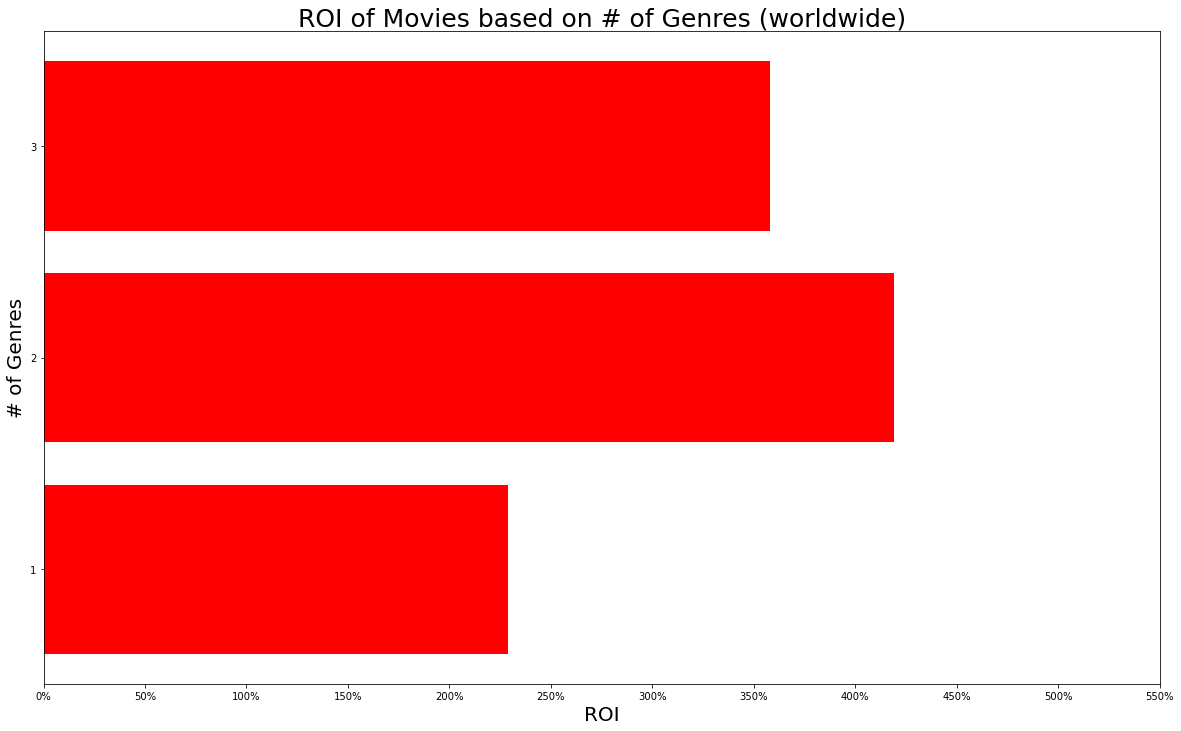

In [336]:
#barplot of ROI by number of genres

fig, ax = plt.subplots(figsize=(20,12))

ax.barh(num_genres_roi.index, list(num_genres_roi), color='red')

ax.set_title('ROI of Movies based on # of Genres (worldwide)', fontsize=25)
ax.set_ylabel("# of Genres", fontsize=20)
ax.set_yticks([1,2,3])
ax.set_xlabel('ROI', fontsize=20)
ax.set_xticks(range(0,600,50))
ax.set_xticklabels(['{}%'.format(i) for i in range(0,600,50)])

plt.show()

In [234]:
#dropping duplicates
main_df.drop_duplicates(subset=['movie_id'], inplace=True)

In [235]:
#calculating amount of movies in each genre in the dataset

genre_amt = []

for i in genre_columns:
    num_genre = main_df[i].sum()
    genre_amt.append(num_genre)
    print("{}: {}".format(i, num_genre))

Western: 5
Fantasy: 35
Drama: 480
Musical: 12
News: 4
Documentary: 123
Music: 22
Horror: 102
Sport: 24
Adventure: 86
Thriller: 164
Animation: 21
Biography: 65
Family: 39
History: 24
Mystery: 58
Crime: 108
Romance: 77
Sci-Fi: 61
Comedy: 190
War: 11
Action: 161


85.0909090909091
59.5


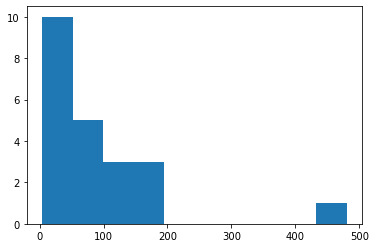

In [236]:
#searching for best way to change data for outliers

import numpy as np

genre_amt = np.array(genre_amt)

mean = np.mean(genre_amt)
median = np.median(genre_amt)
print(mean)
print(median)

plt.hist(genre_amt)
plt.show()

In [237]:
#function to condense genres with less than 25 movies into a new genre called 'Other'

def other_genre(genre):
    if 'News' or 'Sport' or 'Music' or 'War' or 'Western' or 'Musical' or 'History' in genre:
        return 1
    else:
        return 0

#created new binary column for 'Other' and dropped unnecessary columns
main_df['Other'] = main_df.genres.apply(lambda x: other_genre(x))
main_df.drop(columns=['News', 'Sport', 'Music', 'War', 'Western', 'Musical', 'History'], inplace=True)

In [240]:
main_df

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Sci-Fi,Comedy,Action,ROI_worldwide,ROI_domestic,gross_profit_margin_worldwide,gross_profit_margin_domestic,num_of_genres,rating,Other
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014",3300000.0,...,0,0,0,1080.879909,296.727455,91.531738,74.793779,1,Good,1
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997",36000000.0,...,0,0,0,39.330956,39.330956,28.228440,28.228440,1,Good,1
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012",1000000.0,...,0,0,0,10075.949000,5226.294500,99.017291,98.122522,2,Good,1
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019",170000000.0,...,1,0,1,137.044727,-49.582229,57.813869,-98.342765,3,Great,1
5,tt0443272,2012,150.0,"[Biography, Drama, History]",7.4,228701,Lincoln,73,"Nov 9, 2012",65000000.0,...,0,0,0,320.532740,180.319958,76.220639,64.326479,3,Great,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,tt7961060,2018,100.0,"[Action, Adventure, Animation]",8.0,16465,Dragon Ball Super: Broly,36,"Jan 16, 2019",8500000.0,...,0,0,1,1344.091235,257.373588,93.075230,72.018078,3,Great,1
1221,tt7981492,2018,113.0,"[Horror, Thriller]",4.3,971,Sabrina,60,"Dec 15, 1995",58000000.0,...,0,0,0,50.172414,-7.830484,33.409874,-8.495742,2,Bad,1
1224,tt8450662,2018,66.0,[Documentary],7.3,22,Beloved,65,"Oct 16, 1998",53000000.0,...,0,0,0,-56.882100,-56.882100,-131.922241,-131.922241,1,Great,1
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018",5000000.0,...,0,0,0,33.074300,27.046120,24.854010,21.288427,1,Good,1


In [241]:
#created function to merge animation and family movies into one genre

def family_animation(genre):
    if 'Family' in genre or 'Animation' in genre:
        return 1
    else:
        return 0

#created new genre column called 'Family Friendly'
main_df['Family Friendly'] = main_df.genres.apply(lambda x: family_animation(x))

In [243]:
main_df

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Comedy,Action,ROI_worldwide,ROI_domestic,gross_profit_margin_worldwide,gross_profit_margin_domestic,num_of_genres,rating,Other,Family Friendly
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014",3300000.0,...,0,0,1080.879909,296.727455,91.531738,74.793779,1,Good,1,0
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997",36000000.0,...,0,0,39.330956,39.330956,28.228440,28.228440,1,Good,1,0
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012",1000000.0,...,0,0,10075.949000,5226.294500,99.017291,98.122522,2,Good,1,0
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019",170000000.0,...,0,1,137.044727,-49.582229,57.813869,-98.342765,3,Great,1,0
5,tt0443272,2012,150.0,"[Biography, Drama, History]",7.4,228701,Lincoln,73,"Nov 9, 2012",65000000.0,...,0,0,320.532740,180.319958,76.220639,64.326479,3,Great,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,tt7961060,2018,100.0,"[Action, Adventure, Animation]",8.0,16465,Dragon Ball Super: Broly,36,"Jan 16, 2019",8500000.0,...,0,1,1344.091235,257.373588,93.075230,72.018078,3,Great,1,1
1221,tt7981492,2018,113.0,"[Horror, Thriller]",4.3,971,Sabrina,60,"Dec 15, 1995",58000000.0,...,0,0,50.172414,-7.830484,33.409874,-8.495742,2,Bad,1,0
1224,tt8450662,2018,66.0,[Documentary],7.3,22,Beloved,65,"Oct 16, 1998",53000000.0,...,0,0,-56.882100,-56.882100,-131.922241,-131.922241,1,Great,1,0
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018",5000000.0,...,0,0,33.074300,27.046120,24.854010,21.288427,1,Good,1,0


In [244]:
#created function to combine sci-fi and fantasy genre
def scifi_fantasy(genre):
    if 'Sci-Fi' in genre or 'Fantasy' in genre:
        return 1
    else:
        return 0

#created new column for sci-fi/fantasy movies
main_df['Sci-Fi/Fantasy'] = main_df.genres.apply(lambda x: scifi_fantasy(x))

In [246]:
main_df

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Action,ROI_worldwide,ROI_domestic,gross_profit_margin_worldwide,gross_profit_margin_domestic,num_of_genres,rating,Other,Family Friendly,Sci-Fi/Fantasy
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014",3300000.0,...,0,1080.879909,296.727455,91.531738,74.793779,1,Good,1,0,0
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997",36000000.0,...,0,39.330956,39.330956,28.228440,28.228440,1,Good,1,0,0
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012",1000000.0,...,0,10075.949000,5226.294500,99.017291,98.122522,2,Good,1,0,0
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019",170000000.0,...,1,137.044727,-49.582229,57.813869,-98.342765,3,Great,1,0,1
5,tt0443272,2012,150.0,"[Biography, Drama, History]",7.4,228701,Lincoln,73,"Nov 9, 2012",65000000.0,...,0,320.532740,180.319958,76.220639,64.326479,3,Great,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,tt7961060,2018,100.0,"[Action, Adventure, Animation]",8.0,16465,Dragon Ball Super: Broly,36,"Jan 16, 2019",8500000.0,...,1,1344.091235,257.373588,93.075230,72.018078,3,Great,1,1,0
1221,tt7981492,2018,113.0,"[Horror, Thriller]",4.3,971,Sabrina,60,"Dec 15, 1995",58000000.0,...,0,50.172414,-7.830484,33.409874,-8.495742,2,Bad,1,0,0
1224,tt8450662,2018,66.0,[Documentary],7.3,22,Beloved,65,"Oct 16, 1998",53000000.0,...,0,-56.882100,-56.882100,-131.922241,-131.922241,1,Great,1,0,0
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018",5000000.0,...,0,33.074300,27.046120,24.854010,21.288427,1,Good,1,0,0


In [247]:
main_df.columns

Index(['movie_id', 'start_year', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'title', 'id', 'release_date', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'Fantasy', 'Drama', 'Documentary',
       'Horror', 'Adventure', 'Thriller', 'Animation', 'Biography', 'Family',
       'Mystery', 'Crime', 'Romance', 'Sci-Fi', 'Comedy', 'Action',
       'ROI_worldwide', 'ROI_domestic', 'gross_profit_margin_worldwide',
       'gross_profit_margin_domestic', 'num_of_genres', 'rating', 'Other',
       'Family Friendly', 'Sci-Fi/Fantasy'],
      dtype='object')

In [248]:
#dropped more unnecessary columns
main_df.drop(columns=['Sci-Fi', 'Family', 'Animation', 'Fantasy'], inplace=True)

In [249]:
main_df

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,title,id,release_date,production_budget,...,Action,ROI_worldwide,ROI_domestic,gross_profit_margin_worldwide,gross_profit_margin_domestic,num_of_genres,rating,Other,Family Friendly,Sci-Fi/Fantasy
0,tt0339736,2017,98.0,[Horror],5.6,2420,Whiplash,43,"Oct 10, 2014",3300000.0,...,0,1080.879909,296.727455,91.531738,74.793779,1,Good,1,0,0
2,tt0426566,2012,NaN,[Drama],6.0,13,Breakdown,11,"May 2, 1997",36000000.0,...,0,39.330956,39.330956,28.228440,28.228440,1,Good,1,0,0
3,tt0436230,2010,NaN,"[Horror, Thriller]",6.7,34,The Devil Inside,12,"Jan 6, 2012",1000000.0,...,0,10075.949000,5226.294500,99.017291,98.122522,2,Good,1,0,0
4,tt0437086,2019,122.0,"[Action, Adventure, Sci-Fi]",7.5,88207,Alita: Battle Angel,24,"Feb 14, 2019",170000000.0,...,1,137.044727,-49.582229,57.813869,-98.342765,3,Great,1,0,1
5,tt0443272,2012,150.0,"[Biography, Drama, History]",7.4,228701,Lincoln,73,"Nov 9, 2012",65000000.0,...,0,320.532740,180.319958,76.220639,64.326479,3,Great,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,tt7961060,2018,100.0,"[Action, Adventure, Animation]",8.0,16465,Dragon Ball Super: Broly,36,"Jan 16, 2019",8500000.0,...,1,1344.091235,257.373588,93.075230,72.018078,3,Great,1,1,0
1221,tt7981492,2018,113.0,"[Horror, Thriller]",4.3,971,Sabrina,60,"Dec 15, 1995",58000000.0,...,0,50.172414,-7.830484,33.409874,-8.495742,2,Bad,1,0,0
1224,tt8450662,2018,66.0,[Documentary],7.3,22,Beloved,65,"Oct 16, 1998",53000000.0,...,0,-56.882100,-56.882100,-131.922241,-131.922241,1,Great,1,0,0
1225,tt8632862,2018,128.0,[Documentary],6.7,11628,Fahrenheit 11/9,29,"Sep 21, 2018",5000000.0,...,0,33.074300,27.046120,24.854010,21.288427,1,Good,1,0,0


In [251]:
#updated genre list

genre_columns.remove('War')
genre_columns.remove('News')
genre_columns.remove('Sci-Fi')
genre_columns.remove('Sport')
genre_columns.remove('History')
genre_columns.remove('Western')
genre_columns.remove('Family')
genre_columns.remove('Animation')
genre_columns.remove('Music')
genre_columns.remove('Musical')
genre_columns.remove('Fantasy')

genre_columns.append('Family Friendly')
genre_columns.append('Sci-Fi/Fantasy')
genre_columns.append('Other')

In [252]:
genre_columns

['Drama',
 'Documentary',
 'Horror',
 'Adventure',
 'Thriller',
 'Biography',
 'Mystery',
 'Crime',
 'Romance',
 'Comedy',
 'Action',
 'Family Friendly',
 'Sci-Fi/Fantasy',
 'Other']

In [253]:
#created a list calle groups that has dataframes grouped by all the genres in main_df 

groups = []

for i in genre_columns:
    i = main_df.groupby([i]).mean()
    groups.append(i)

len(groups)

14

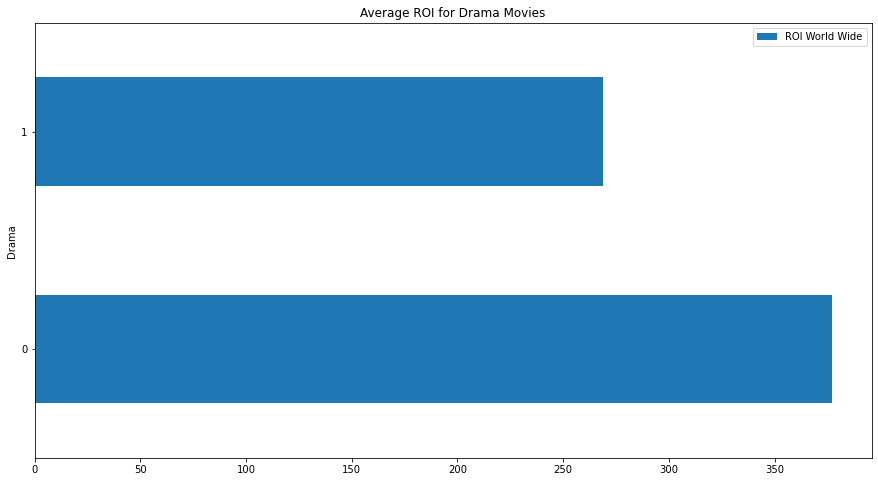

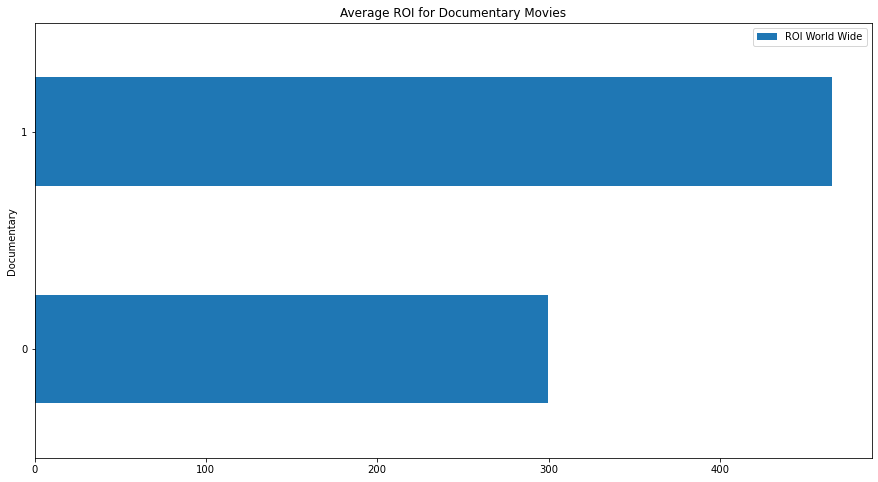

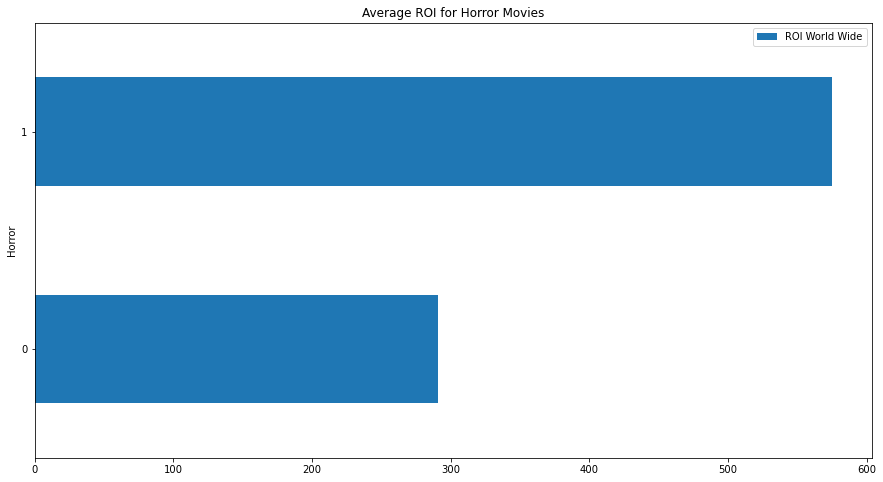

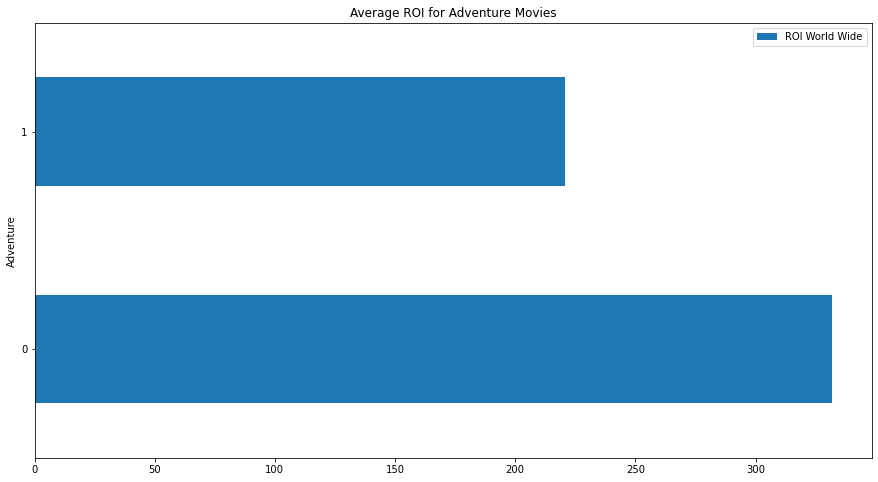

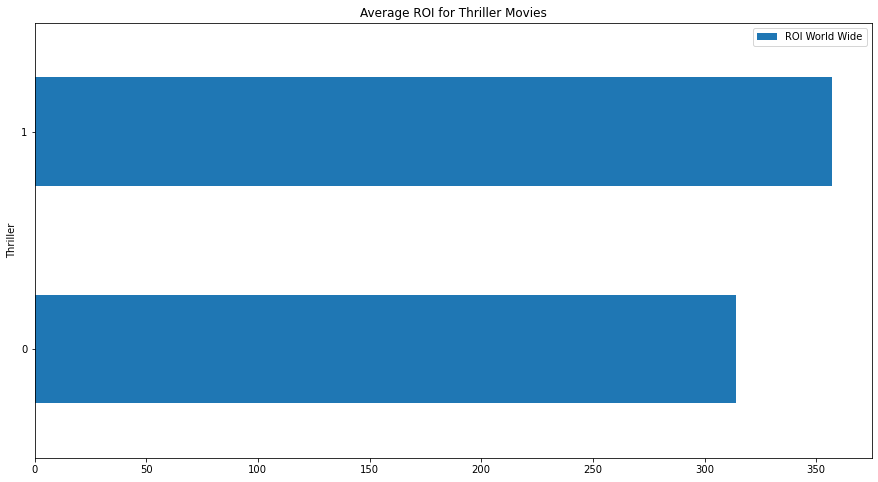

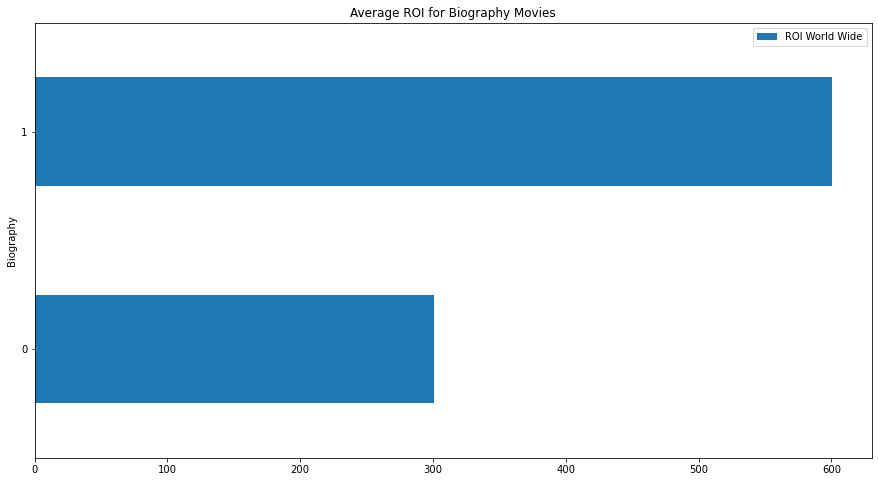

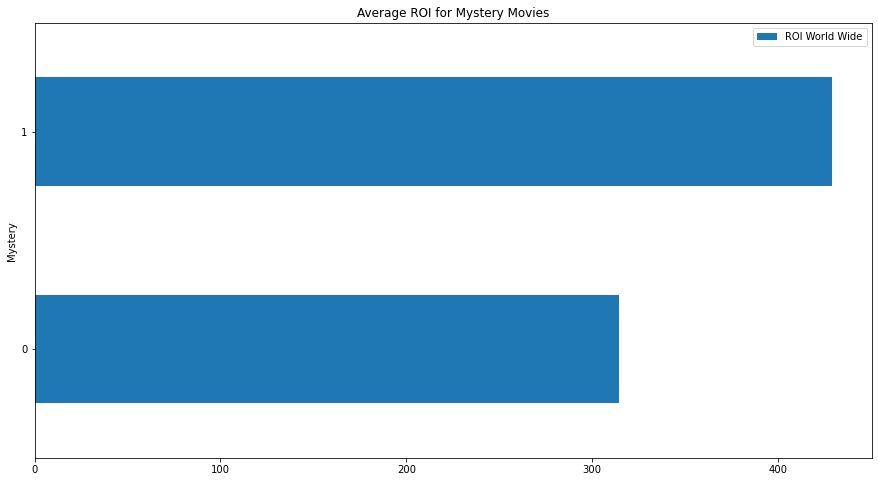

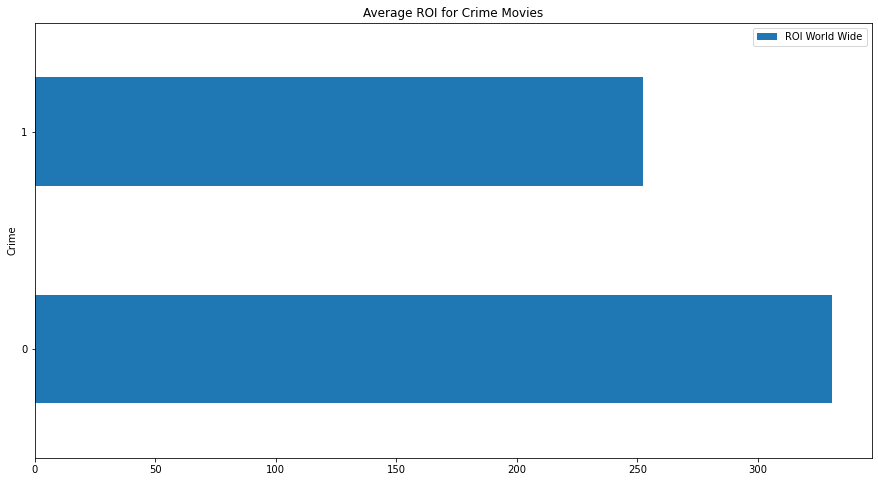

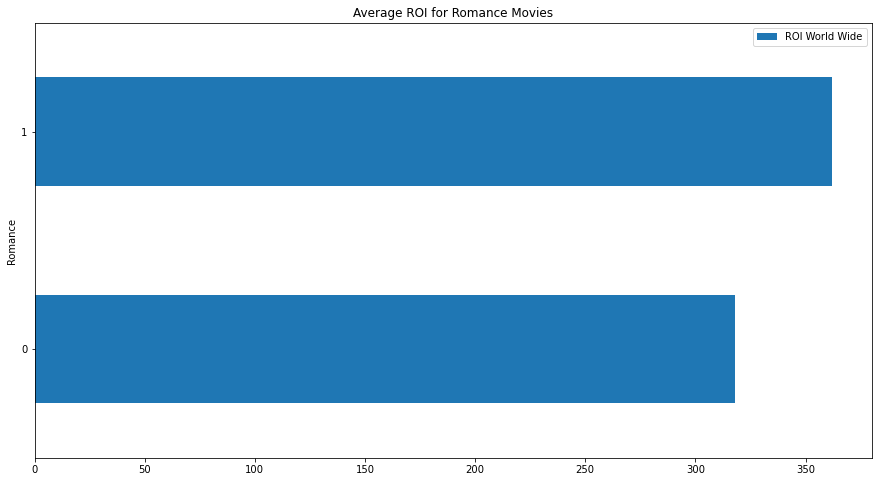

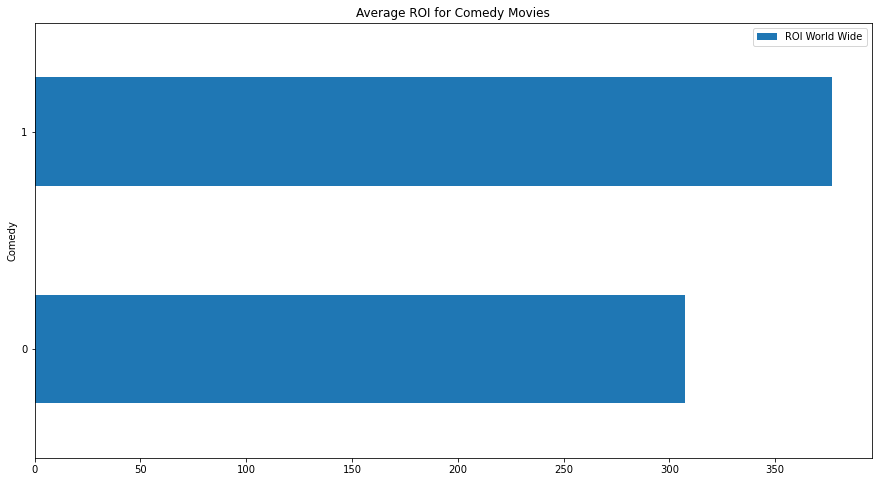

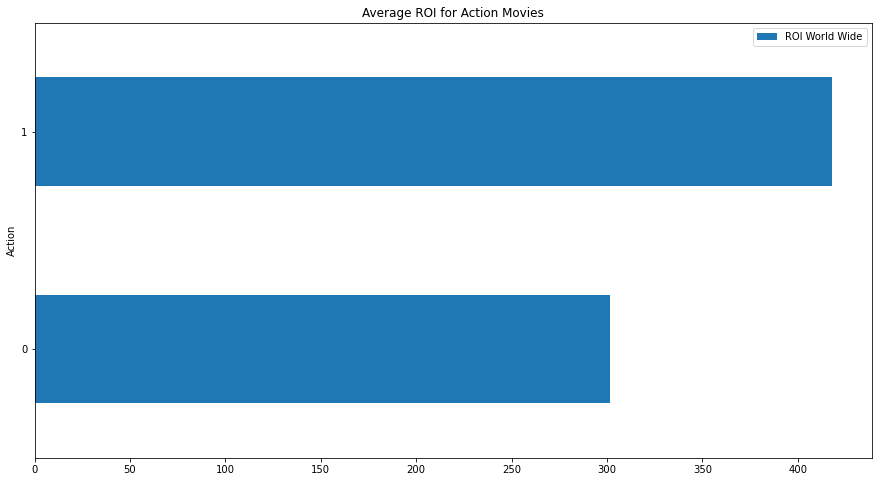

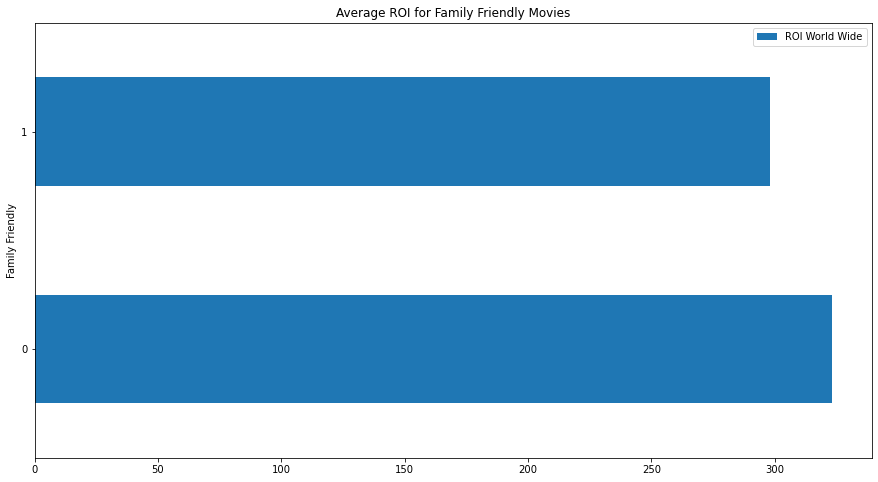

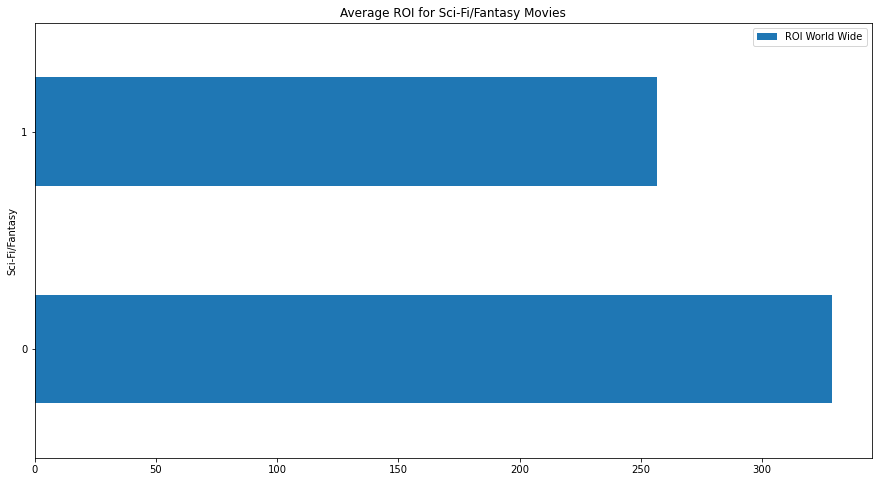

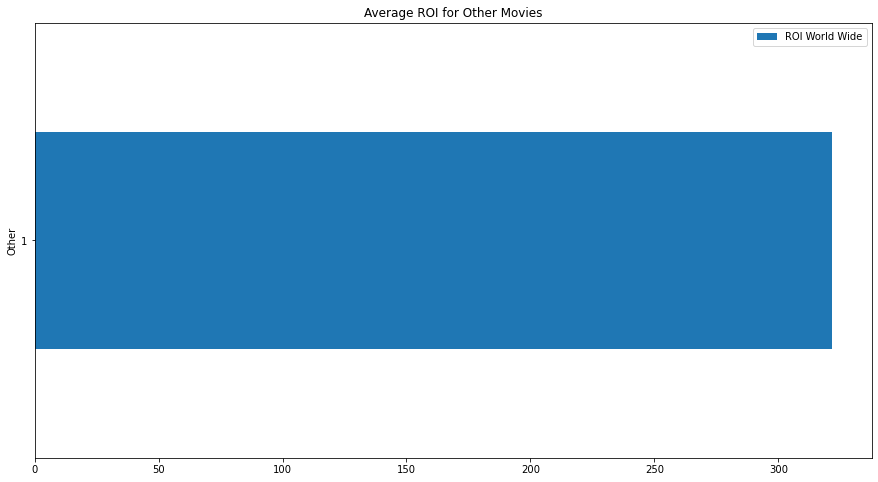

In [255]:
#empty dictionary to store average ROI for each genre
genres_dct = {}

#for loop which generates graphs for individaul genres and ROI
#adds genre and ROI to genres_dct
counter = 0
for i in genre_columns:
    

    groups[counter][['ROI_worldwide']].plot(kind='barh', figsize=(15,8))
    plt.legend(['ROI World Wide'])
    plt.title('Average ROI for {} Movies'.format(i))
    
    genres_dct[i] = list(groups[counter][['ROI_worldwide']].loc[1])[0]
                                                                
    plt.show()
    counter +=1

In [256]:
genres_dct

{'Drama': 268.7528219917036,
 'Documentary': 465.22109527957565,
 'Horror': 574.770986077203,
 'Adventure': 220.69631137428303,
 'Thriller': 356.94524577414217,
 'Biography': 600.2801257009237,
 'Mystery': 428.8087264880483,
 'Crime': 252.16561474499554,
 'Romance': 361.89123111187695,
 'Comedy': 376.74784506410145,
 'Action': 417.7867574977618,
 'Family Friendly': 297.97818395789113,
 'Sci-Fi/Fantasy': 256.554589429844,
 'Other': 321.50741399874045}

<AxesSubplot:>

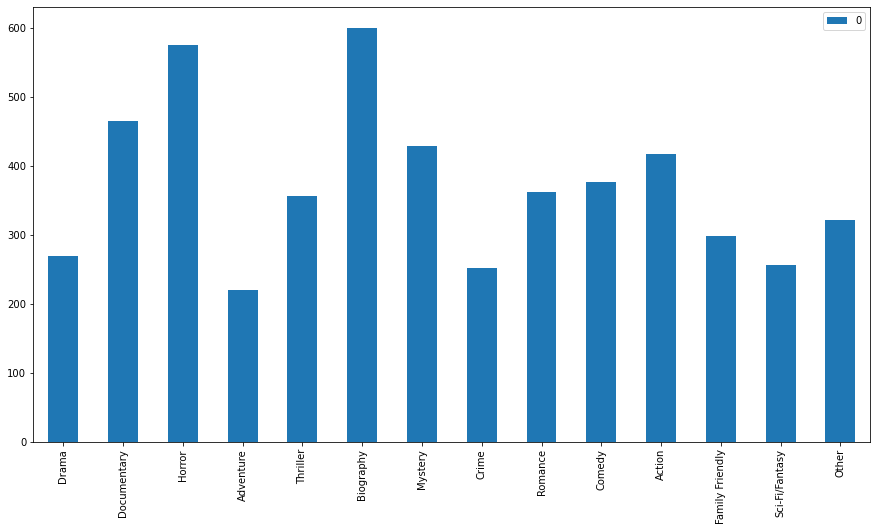

In [257]:
#created a dataframe using genres_dct

ROI = pd.DataFrame(data=genres_dct, index=range(1))
ROI = ROI.transpose()

#plotted Average ROI by genre
ROI.plot(kind='bar', figsize=(15,8))

Text(0.5, 1.0, 'Top 5 Genre ROI')

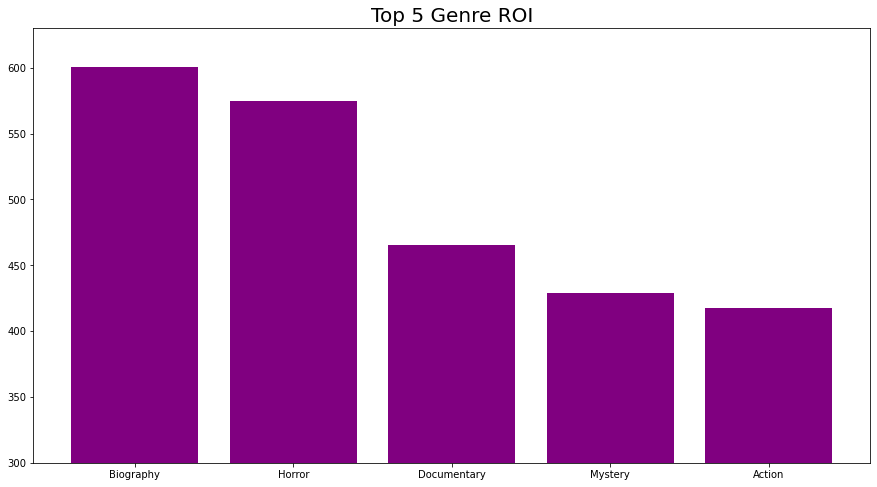

In [258]:
#created a series of the five genres with the highest average ROIs
top_5_genres = ROI[0].sort_values(ascending=False)[0:5]

#plotted average ROI for 5 best genres
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(range(5), top_5_genres, color='purple')
ax.set_xticks(range(len(top_5_genres)))
ax.set_xticklabels(top_5_genres.index)
ax.set_ylim(300)

ax.set_title('Top 5 Genre ROI', fontsize=20)

In [259]:
top_5_genres.index

Index(['Biography', 'Horror', 'Documentary', 'Mystery', 'Action'], dtype='object')

In [260]:
#filterting dataframe

wanted_columns=['movie_id', 'averagerating', 'numvotes', 'num_of_genres', 'rating',
                'ROI_worldwide', 'Biography', 'Mystery', 'Horror', 'Documentary', 'Action']

filtered_df = main_df.loc[:, wanted_columns]

In [262]:
#loaded in database with directors

directors= pd.read_sql("""

SELECT primary_name as director, movie_id
FROM persons
JOIN directors
    USING(person_id)
""", conn)

In [263]:
#merged directors with filtered_df

directors_ROI = filtered_df.merge(directors, on='movie_id')

In [264]:
directors_ROI

,movie_id,averagerating,numvotes,num_of_genres,rating,ROI_worldwide,Biography,Mystery,Horror,Documentary,Action,director
0,tt0339736,5.6,2420,1,Good,1080.879909,0,0,1,0,0,Andrew Getty
1,tt0426566,6.0,13,1,Good,39.330956,0,0,0,0,0,Julio Bove
2,tt0426566,6.0,13,1,Good,39.330956,0,0,0,0,0,Julio Bove
3,tt0436230,6.7,34,2,Good,10075.949000,0,0,1,0,0,Joaquin Perea
4,tt0436230,6.7,34,2,Good,10075.949000,0,0,1,0,0,Joaquin Perea
...,...,...,...,...,...,...,...,...,...,...,...,...
2124,tt8632862,6.7,11628,1,Good,33.074300,0,0,0,1,0,Michael Moore
2125,tt9024106,6.3,5945,2,Good,201.793683,1,0,0,0,0,Chuck Konzelman
2126,tt9024106,6.3,5945,2,Good,201.793683,1,0,0,0,0,Chuck Konzelman
2127,tt9024106,6.3,5945,2,Good,201.793683,1,0,0,0,0,Cary Solomon


In [265]:
grouped_director = directors_ROI.groupby(['director']).mean()
grouped_director['ROI_worldwide'].sort_values(ascending=False)[0:5].plot(kind='bar')

In [267]:
biography = directors_ROI[directors_ROI.Biography == 1]
top_bio_directors = biography.groupby(['director']).mean()['ROI_worldwide'].sort_values(ascending=False)[0:5]

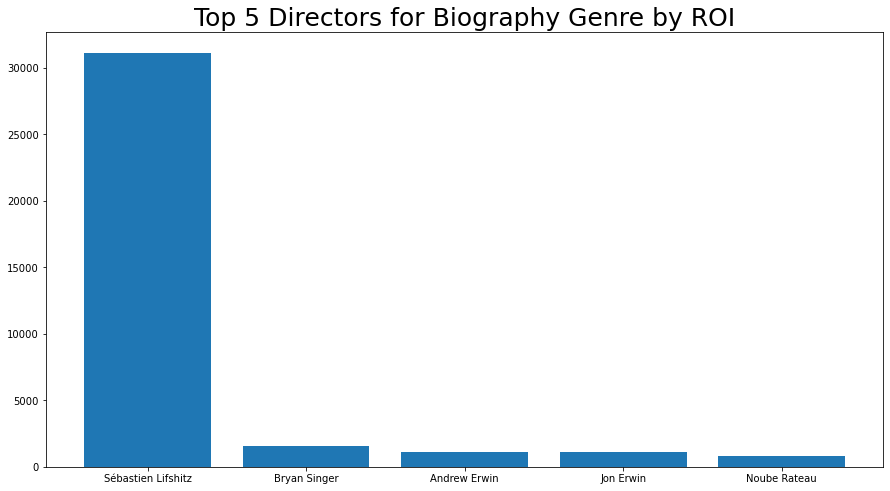

In [268]:
#plotting best directors

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(range(len(top_bio_directors)), top_bio_directors)
ax.set_xticks(range(len(top_bio_directors)))
ax.set_xticklabels(top_bio_directors.index, fontsize=10)
ax.set_title("Top 5 Directors for Biography Genre by ROI", fontsize=25)

plt.show()

In [269]:
top_5_genres.index

Index(['Biography', 'Horror', 'Documentary', 'Mystery', 'Action'], dtype='object')

In [270]:
horror = directors_ROI[directors_ROI.Horror == 1]
top_horror_directors = horror.groupby(['director']).mean()['ROI_worldwide'].sort_values(ascending=False)[0:5]

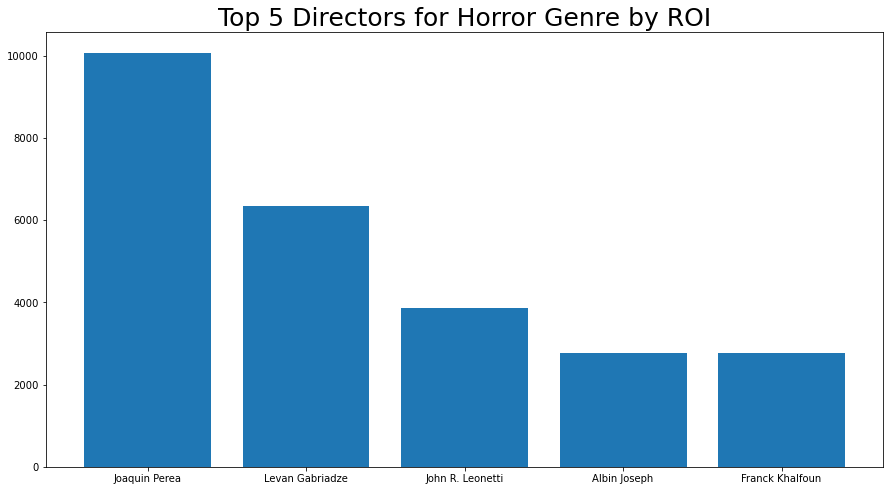

In [271]:
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(range(len(top_horror_directors)), top_horror_directors)
ax.set_xticks(range(len(top_horror_directors)))
ax.set_xticklabels(top_horror_directors.index, fontsize=10)
ax.set_title("Top 5 Directors for Horror Genre by ROI", fontsize=25)

plt.show()

In [272]:
documentary = directors_ROI[directors_ROI.Documentary == 1]
top_documentary_directors = documentary.groupby(['director']).mean()['ROI_worldwide'].sort_values(ascending=False)[0:5]

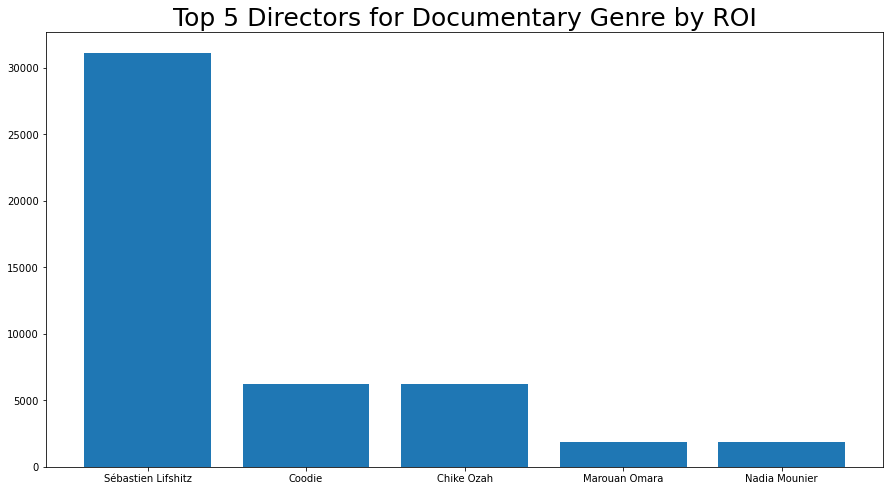

In [273]:
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(range(len(top_documentary_directors)), top_documentary_directors)
ax.set_xticks(range(len(top_documentary_directors)))
ax.set_xticklabels(top_documentary_directors.index, fontsize=10)
ax.set_title("Top 5 Directors for Documentary Genre by ROI", fontsize=25)

plt.show()

In [274]:
mystery = directors_ROI[directors_ROI.Mystery == 1]
top_mystery_directors = mystery.groupby(['director']).mean()['ROI_worldwide'].sort_values(ascending=False)[0:5]

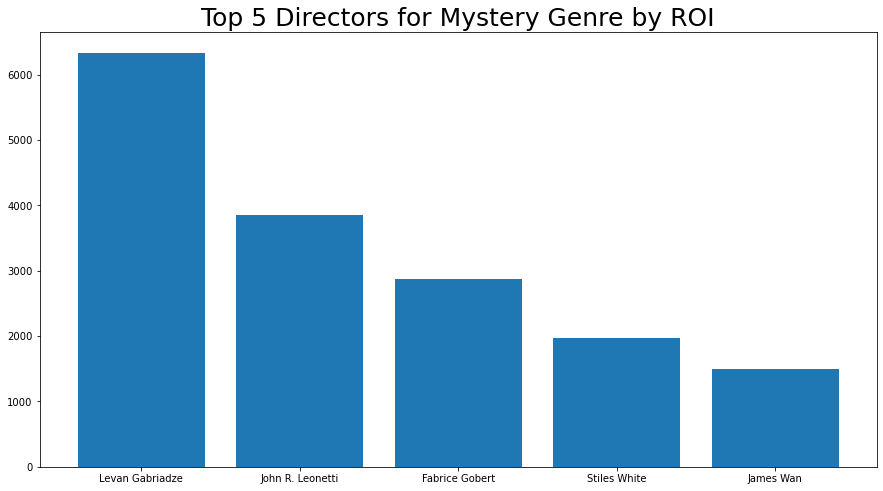

In [275]:
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(range(len(top_mystery_directors)), top_mystery_directors)
ax.set_xticks(range(len(top_mystery_directors)))
ax.set_xticklabels(top_mystery_directors.index, fontsize=10)
ax.set_title("Top 5 Directors for Mystery Genre by ROI", fontsize=25)

plt.show()

In [276]:
action = directors_ROI[directors_ROI.Action == 1]
top_action_directors = action.groupby(['director']).mean()['ROI_worldwide'].sort_values(ascending=False)[0:5]

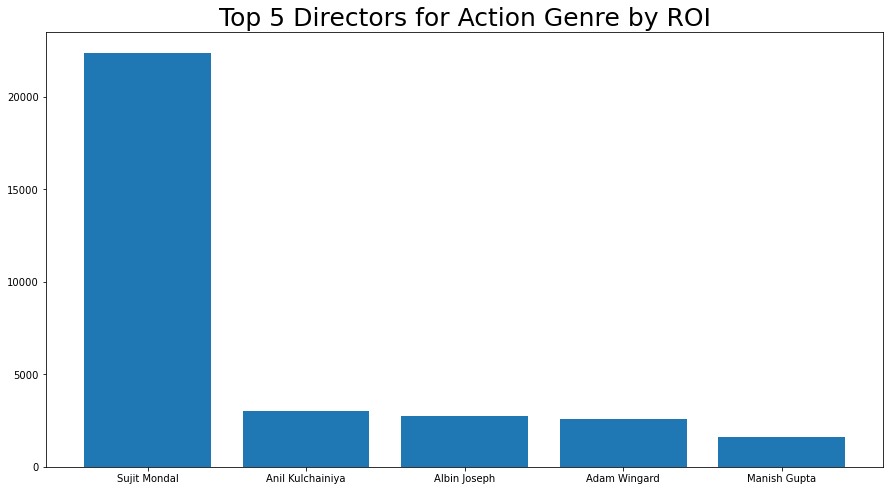

In [277]:
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(range(len(top_action_directors)), top_action_directors)
ax.set_xticks(range(len(top_action_directors)))
ax.set_xticklabels(top_action_directors.index, fontsize=10)
ax.set_title("Top 5 Directors for Action Genre by ROI", fontsize=25)

plt.show()

In [278]:
main_df.reset_index(inplace=True)

In [279]:
counter = 0
bio_doc_films = []
for i in main_df.genres:
    if ('Biography' in i) and ('Documentary' in i):
        bio_doc_films.append(main_df.loc[counter, 'title'])
    counter +=1

bio_doc_films

['The Joneses',
 'Iris',
 'Three Kings',
 'Inside Out',
 'Last Man Standing',
 'Born to Fly: Elizabeth Streb vs. Gravity',
 'The Lost City',
 'Step Up',
 'Ballerina',
 'Bambi',
 'All or Nothing',
 'Romeo Is Bleeding',
 'Jumper',
 'Virtuosity',
 'Limitless',
 'Bobby',
 'Yes',
 'Death Sentence']

In [280]:
counter = 0
horror_action_films = []
for i in main_df.genres:
    if ('Horror' in i) and ('Action' in i):
        horror_action_films.append(main_df.loc[counter, 'title'])
    counter +=1
horror_action_films

['Resident Evil: Afterlife',
 'I, Frankenstein',
 "You're Next",
 'The Forgotten',
 'Maniac',
 'The Hunted',
 'The Strangers',
 'Resident Evil: The Final Chapter',
 'Creature',
 'Tag',
 'Mandy',
 'The First Purge',
 'Outbreak']

In [281]:
counter = 0
mystery_action_films = []
for i in main_df.genres:
    if ('Mystery' in i) and ('Action' in i):
        mystery_action_films.append(main_df.loc[counter, 'title'])
    counter +=1
mystery_action_films

['Inescapable', 'Non-Stop', 'Panic Room', 'The Guardian']

In [282]:
counter = 0
mystery_horror_films = []
for i in main_df.genres:
    if ('Mystery' in i) and ('Horror' in i):
        mystery_action_films.append(main_df.loc[counter, 'title'])
    counter +=1
mystery_horror_films

[]

In [283]:
counter = 0
mystery_documentary_films = []
for i in main_df.genres:
    if ('Mystery' in i) and ('Documentary' in i):
        mystery_documentary_films.append(main_df.loc[counter, 'title'])
    counter +=1
mystery_documentary_films

[]

In [284]:
counter = 0
horror_documentary_films = []
for i in main_df.genres:
    if ('Horror' in i) and ('Documentary' in i):
        horror_documentary_films.append(main_df.loc[counter, 'title'])
    counter +=1
horror_documentary_films

[]

In [285]:
counter = 0
biography_horror_films = []
for i in main_df.genres:
    if ('Horror' in i) and ('Biography' in i):
        biography_horror_films.append(main_df.loc[counter, 'title'])
    counter +=1
biography_horror_films

[]

In [286]:
counter = 0
mystery_bio_films = []
for i in main_df.genres:
    if ('Mystery' in i) and ('Biography' in i):
        mystery_bio_films.append(main_df.loc[counter, 'title'])
    counter +=1
mystery_bio_films

[]

In [287]:
counter = 0
doc_action_films = []
for i in main_df.genres:
    if ('Documentary' in i) and ('Action' in i):
        doc_action_films.append(main_df.loc[counter, 'title'])
    counter +=1
doc_action_films

['Jackass 3D',
 'The Return',
 'Born to Fly: Elizabeth Streb vs. Gravity',
 'The Hammer',
 'Down by Law',
 'Snow Day']

In [288]:
top_5_genres.index

Index(['Biography', 'Horror', 'Documentary', 'Mystery', 'Action'], dtype='object')

In [289]:
counter = 0
bio_action_films = []
for i in main_df.genres:
    if ('Action' in i) and ('Biography' in i):
        bio_action_films.append(main_df.loc[counter, 'title'])
    counter +=1
bio_action_films

['Machine Gun Preacher',
 'Born to Fly: Elizabeth Streb vs. Gravity',
 'The Masked Saint']